In [1]:
import os
import csv
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import json
from pandas import json_normalize


In [2]:
# All help functions that can be used when analysing different datasets

def quick_look(data_raw):
    print("Number of rows in data =", data_raw.shape[0])
    print("Number of columns in data =", data_raw.shape[1])
    print("\n**Sample data:** \n")
    print(data_raw.head(300))


Number of rows in data = 20844
Number of columns in data = 13

**Sample data:** 

      id                                            message  tfa  banking  \
0      1  Account S{4DIGITS} {REDACTED} balance is (${AM...    0        1   
1      2  CreditUnion2Way {REDACTED} BAL {AMOUNT}- (1of1...    0        1   
2      3  +{11DIGITS}_fb0b{4DIGITS}-{4DIGITS}-{4DIGITS}-...    0        0   
3      4  {TIME}  3 OUTBOUND  {5DIGITS}) WESTBROOK HUB  ...    0        0   
4      5  MARKET ST {7DIGITS} Date {DATE} {12DIGITS} {4D...    0        0   
..   ...                                                ...  ...      ...   
295  296  BioTechBreakouts:FDA Insider:Bought 15k SLDB a...    0        0   
296  297  You have selected AAA Approved Repair Facility...    0        0   
297  298  BOULEVARD EAST + BERGENLINE AVE {TIME} 166 LEO...    0        0   
298  299  Account S{4DIGITS} {REDACTED} balance is ${AMO...    0        1   
299  300  Hi Evelyn,it"s Noemi with Apple One just calle...    0       

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


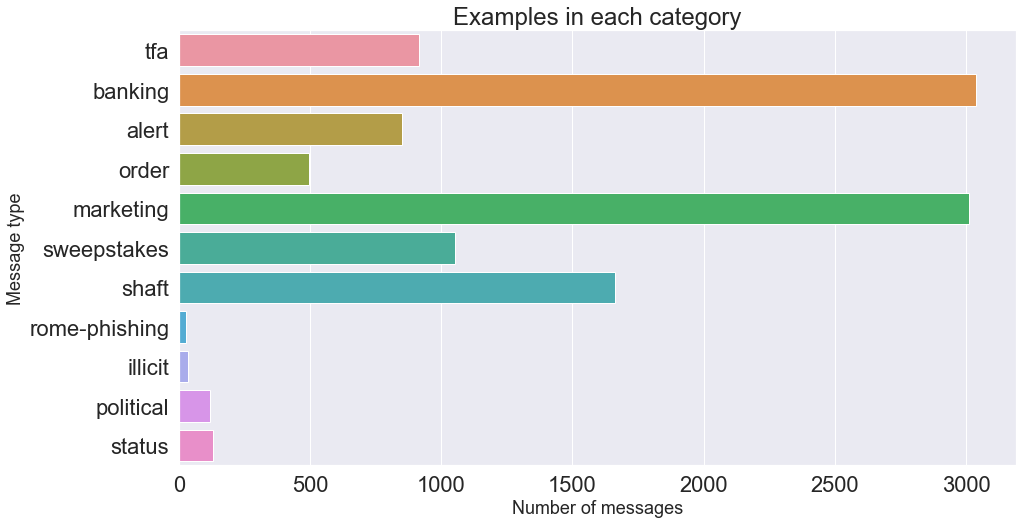

In [4]:
#pd.set_option('display.max_colwidth', None)

def list_of_dicts(ld):
    '''
    Create a mapping of the tuples formed after
    converting json strings of list to a python list
    '''

    try:
        ls_json = json.loads(ld)
        result = dict([(d['label'], d['value']) for d in ls_json])
    except TypeError as err:
        ld = '[' + ld + ']'
        ls_json = json.loads(ld)
        result = dict([(d['label'], d['value']) for d in ls_json])

    return result

def merge_columns(df, col_0, col_1, dropped_col):
    df[col_0] = df[col_0].where(df[col_0] + df[col_1] == -2, df[col_0] | df[col_1])
    df[col_0] = df[col_0].where(df[col_0] != -1, df[col_1])
    df.drop(columns=[dropped_col], inplace=True)


def load_and_parse_sinch_data():
    data_path_0 = "data/sinchdata/df_part_0.parquet"
    data_raw_0 = pd.read_parquet(data_path_0).replace({'\'': '"'}, regex=True)

    data_path_1 = "data/sinchdata/df_part_1.parquet"
    data_raw_1 = pd.read_parquet(data_path_1).replace({'\'': '"'}, regex=True)

    data_path_2 = "data/sinchdata/df_part_2.parquet"
    data_raw_2 = pd.read_parquet(data_path_2).replace({'\'': '"'}, regex=True)

    data_raw = pd.concat([data_raw_0, data_raw_1, data_raw_2])

    labels_df = json_normalize(data_raw['labels'].apply(list_of_dicts).tolist())
    labels_df = labels_df.drop(columns=['re-mt-shaft', 'rome-phishing-mt-regex', 'en', 'es', 'mt', 'political-regex',
                                        'pt', 'OTP', 'Bank', 'status update', 'Political campaign', 'alcohol',
                                        'tobacco', 'phishing_quick', 'mo-optout', 'phishing-or', 'shaft-or', 'phishing_url'])
    labels_df = labels_df.fillna(-1)
    labels_df = labels_df.replace('positive', 1)
    labels_df = labels_df.replace('negative', 0)

    #merge_columns(labels_df, 'tfa', 'OTP', 'OTP')

    #labels_df.tfa = labels_df.tfa.where(labels_df.tfa != -1, labels_df.tfa | labels_df.OTP)
    #labels_df['tfa'] = labels_df['tfa'].where(labels_df['tfa'] != -1, labels_df['OTP'])
    #labels_df.drop(columns=['OTP'], inplace=True)

    df = data_raw[['id', 'message']].join(labels_df)
    #print(df.columns.values)
    quick_look(df)
    #print(df.head())

    return df

def count_each_label(df):
    categories = list(df.columns.values[2:])
    sns.set(font_scale=2)
    plt.figure(figsize=(15, 8))
    label_columns = df.iloc[:, 2:]

    total_count = label_columns.where(label_columns > 0).sum().values
    for i in range(len(total_count)):
        print(categories[i], ': ', total_count[i], '\n')

    sns.barplot(total_count, categories)
    plt.title("Examples in each category", fontsize=24)
    plt.ylabel('Message type', fontsize=18)
    plt.xlabel('Number of messages', fontsize=18)

    plt.savefig('figures/sinch/num_examples_per_label.png')
    plt.show()


df = load_and_parse_sinch_data()
count_each_label(df)


#### Read the data file

In [4]:
toxic_comment = "data/jigsaw-toxic-comment-classification-challenge/train.csv"
data_path = "data/jigsaw-toxic-comment-classification-challenge/train.csv"
data_raw = pd.read_csv(data_path)


#### Bird's-eye view of the dataset

In [4]:
print("Number of rows in data =", data_raw.shape[0])
print("Number of columns in data =", data_raw.shape[1])
print("**Sample data:**")
print(data_raw.head())

Number of rows in data = 159571
Number of columns in data = 8
**Sample data:**
                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  


#### Count the number of comments under each label

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


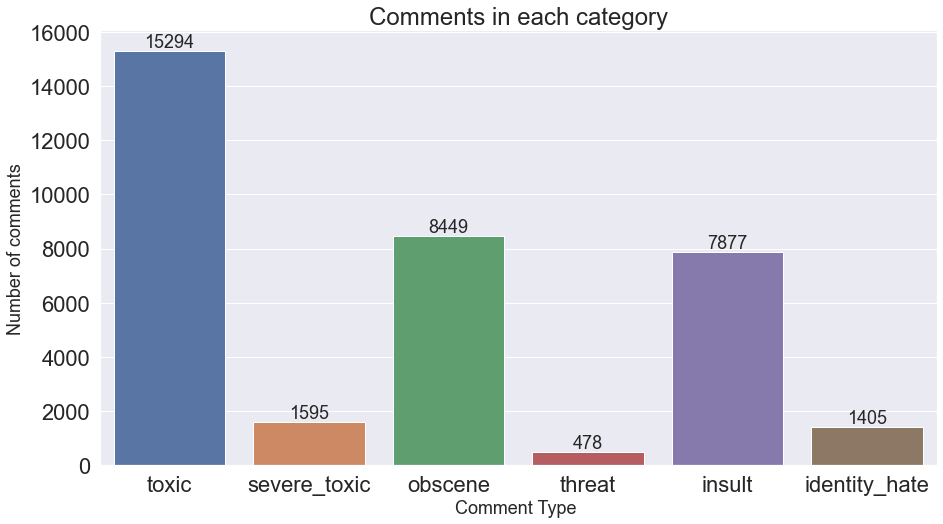

In [5]:
categories = list(data_raw.columns.values[2:])
sns.set(font_scale=2)
plt.figure(figsize=(15, 8))
ax = sns.barplot(categories, data_raw.iloc[:, 2:].sum().values)
plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)
# #adding the text labels
rects = ax.patches
labels = data_raw.iloc[:, 2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.savefig('figures/jigsaw/num_comments_per_label.png')
plt.show()


#### Count the number of comments having multiple labels

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


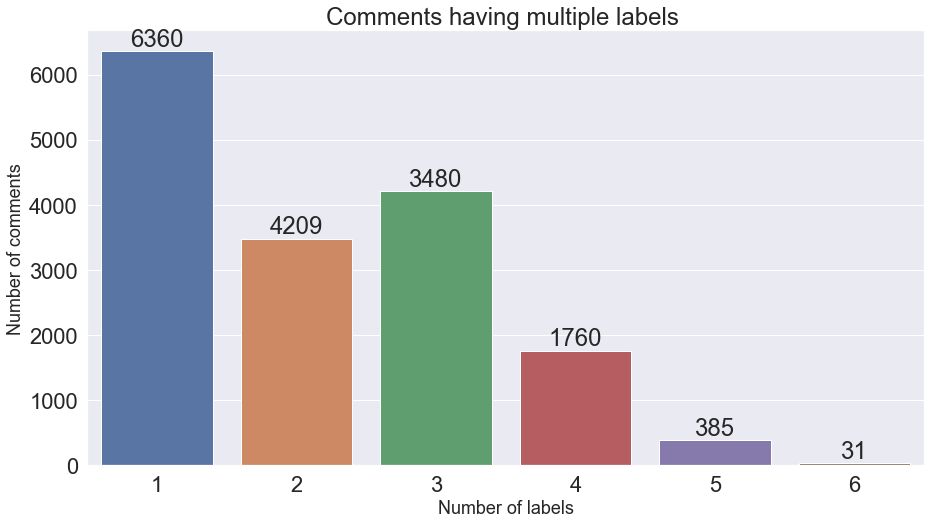

In [6]:
rowSums = data_raw.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.savefig('figures/jigsaw/num_labels_per_comment.png')
plt.show()

#### Word cloud to see the most common words

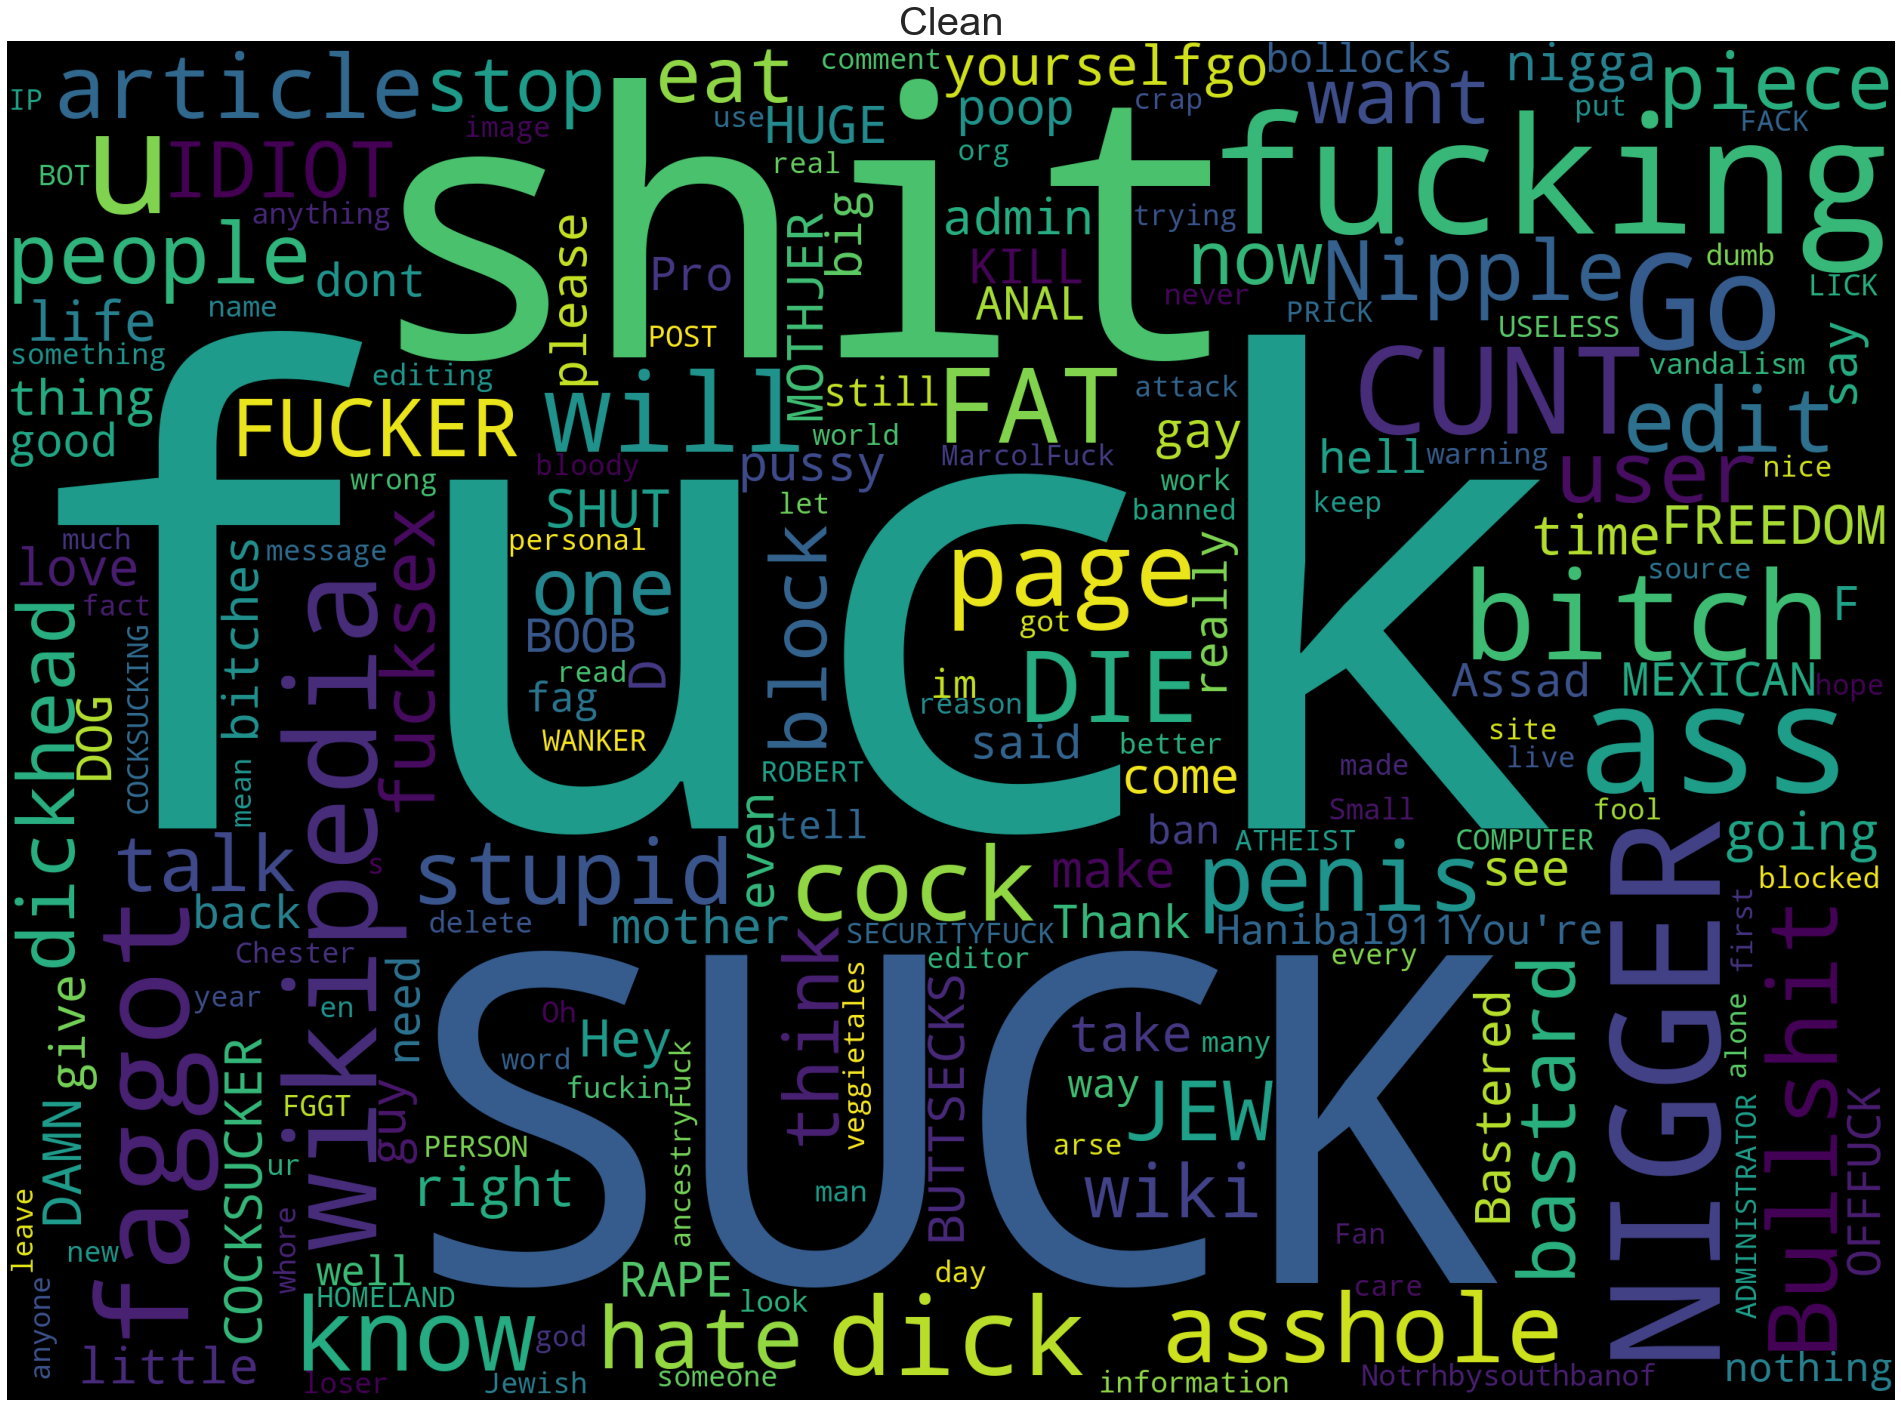

In [7]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(40,25))
# clean
subset = data_raw[data_raw.obscene==1]
text = subset.comment_text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Clean",fontsize=40)
plt.imshow(cloud_toxic)
plt.savefig('figures/jigsaw/wordcloud_whole_set.png')
plt.show()